In [1]:
import numpy as np
import seaborn as sns

In [2]:
# actual_m = 10
# actual_c = 20

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = [2, 1, 2, 1, 7, 6, 7, 6, 12, 11, 12, 11]
y

[2, 1, 2, 1, 7, 6, 7, 6, 12, 11, 12, 11]

<Axes: >

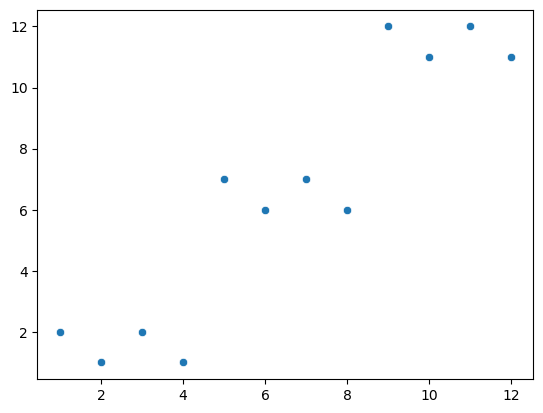

In [3]:
sns.scatterplot(x=x, y=y)

In [4]:
no_of_nodes = 3

In [5]:
N = len(x) // no_of_nodes
# N

In [6]:
# node_1_data = {"x": x[:N], "y": y[:4]}
# node_2_data = {"x": x[4:8], "y": y[4:8]}
# node_3_data = {"x": x[8:12], "y": y[8:12]}
node_data = []
for i in range(no_of_nodes):
    node_data.append({"x": x[i*N:(i+1)*N], "y": y[i*N:(i+1)*N]})
    node_data[-1]["y_mean"] = sum(node_data[-1]["y"])/len(node_data[-1]["y"])
node_data

[{'x': [1, 2, 3, 4], 'y': [2, 1, 2, 1], 'y_mean': 1.5},
 {'x': [5, 6, 7, 8], 'y': [7, 6, 7, 6], 'y_mean': 6.5},
 {'x': [9, 10, 11, 12], 'y': [12, 11, 12, 11], 'y_mean': 11.5}]

In [7]:
node_params = [ {"m": 0, "c": 0} for i in range(no_of_nodes)]
node_params

[{'m': 0, 'c': 0}, {'m': 0, 'c': 0}, {'m': 0, 'c': 0}]

In [8]:
iterations = 100

In [9]:
L = 0.0001 # learning rate

In [10]:
def forward_node(node_id):
    params = node_params[node_id]
    x = node_data[node_id]["x"]
    return [params["m"] * i + params["c"] for i in x]

In [11]:
def loss_fn_node(node_id, y_pred):
    y = node_data[node_id]["y"]
    return (1 / N) * sum( (y[i] - y_pred[i]) ** 2 for i in range(N) )

In [12]:
def r2_score_node(node_id, y_pred):
    y = node_data[node_id]["y"]
    y_mean = node_data[node_id]["y_mean"]
    rss = sum( (y[i] - y_pred[i])**2 for i in range(N) )
    tss = sum( (y[i] - y_mean)**2 for i in range(N) )
    r2 = 1 - rss/tss 
    return r2

In [13]:
def gradient_m_node(node_id, y_pred):
    x = node_data[node_id]["x"]
    y = node_data[node_id]["y"]
    return (-2 / N) * sum( ( x[i] * (y[i] - y_pred[i]) ) for i in range(N) )

In [14]:
def gradient_c_node(node_id, y_pred):
    y = node_data[node_id]["y"]
    return (-2 / N) * sum( (y[i] - y_pred[i]) for i in range(N) )

In [15]:
doubly_stochastic_matrix_config = [
    [1/2, 1/4, 1/4],
    [1/4, 0, 3/4],
    [1/4, 3/4, 0]
]

In [16]:
# doubly_stochastic_matrix_config = [
#     [1/3, 1/3, 1/3],
#     [1/3, 1/3, 1/3],
#     [1/3, 1/3, 1/3]
# ]

In [17]:
# for i in range(iterations):
#     for node_id in range(no_of_nodes):
#         y_pred = forward_node(node_id)
#         loss = loss_fn_node(node_id, y_pred)
#         accuracy = r2_score_node(node_id, y_pred)
#         print("Node:", node_id, "| Loss:", round(loss, 6), "| Accuracy:", round(accuracy, 6))
    
#         grad_m = gradient_m_node(node_id, y_pred)
#         grad_c = gradient_c_node(node_id, y_pred)
#         # print("gradient of m:", grad_m, "| graident of c:", grad_c)

#         params = node_params[node_id]
#         params['m'] = params['m'] - L * grad_m
#         params['c'] = params['c'] - L * grad_c
#         # print(params)
#         # print()

#     # comm and averaging
#     node_params_copy = node_params.copy()
#     for node_id in range(no_of_nodes):
#         doubly_st_mt = doubly_stochastic_matrix_config[node_id]
#         node_params[node_id]["m"] = sum( frac*node_params_copy[i]["m"] for i, frac in enumerate(doubly_st_mt) )
#         node_params[node_id]["c"] = sum( frac*node_params_copy[i]["c"] for i, frac in enumerate(doubly_st_mt) )

#     print(node_params)

In [18]:
for i in range(iterations):
    gradients = []
    for node_id in range(no_of_nodes):
        y_pred = forward_node(node_id)
        loss = loss_fn_node(node_id, y_pred)
        accuracy = r2_score_node(node_id, y_pred)
        print("Node:", node_id, "| Loss:", round(loss, 6), "| Accuracy:", round(accuracy, 6))
    
        grad_m = gradient_m_node(node_id, y_pred)
        grad_c = gradient_c_node(node_id, y_pred)
        # print("gradient of m:", grad_m, "| graident of c:", grad_c)

        gradients.append({"m": grad_m, "c": grad_c})
        # print(params)
        # print()

    # comm and averaging
    for node_id in range(no_of_nodes):
        doubly_st_mt = doubly_stochastic_matrix_config[node_id]
        params = node_params[node_id]
        grad_m = sum( frac*gradients[i]["m"] for i, frac in enumerate(doubly_st_mt) )
        grad_c = sum( frac*gradients[i]["c"] for i, frac in enumerate(doubly_st_mt) )
        params['m'] = params['m'] - L * grad_m
        params['c'] = params['c'] - L * grad_c

    gradients = []
    print(node_params)

Node: 0 | Loss: 2.5 | Accuracy: -9.0
Node: 1 | Loss: 42.5 | Accuracy: -169.0
Node: 2 | Loss: 132.5 | Accuracy: -529.0
[{'m': 0.008475, 'c': 0.0010500000000000002}, {'m': 0.018250000000000002, 'c': 0.0018000000000000002}, {'m': 0.006475000000000001, 'c': 0.0010500000000000002}]
Node: 0 | Loss: 2.438109 | Accuracy: -8.752437
Node: 1 | Loss: 40.958519 | Accuracy: -162.834074
Node: 2 | Loss: 130.920194 | Accuracy: -522.680774
[{'m': 0.016866453125, 'c': 0.0020883031250000005}, {'m': 0.0363867425, 'c': 0.0035885325000000004}, {'m': 0.012825854375000001, 'c': 0.002080824375}]
Node: 0 | Loss: 2.377984 | Accuracy: -8.511936
Node: 1 | Loss: 39.456167 | Accuracy: -156.824667
Node: 2 | Loss: 129.380017 | Accuracy: -516.520068
[{'m': 0.0251753772004375, 'c': 0.0031150349487031256}, {'m': 0.054412366829375, 'c': 0.00536580693390625}, {'m': 0.019053346103187502, 'c': 0.003092596299390625}]
Node: 0 | Loss: 2.319583 | Accuracy: -8.27833
Node: 1 | Loss: 37.992221 | Accuracy: -150.968883
Node: 2 | Loss: